## Importing Libraries 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import IncrementalPCA

## Load the training data and labels

In [3]:
# Load the training data and labels
train_data = np.load('Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_train.npz')
X_train = train_data['arr_0']

train_labels = np.load('Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_train.npz')
y_train = train_labels['arr_0']

# Load the test data and labels
test_data = np.load('Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_test.npz')
X_test = test_data['arr_0']

test_labels = np.load('Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_test.npz')
y_test = test_labels['arr_0']


In [5]:
# Print the shapes of the loaded data
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [6]:
# Load the npz file
dataset = np.load('Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_train.npz')

# Extract the data
x_train = dataset['arr_0']

# Print the shape of the extracted data
print("Training data shape:", x_train.shape)

Training data shape: (60000, 28, 28)


In [7]:
some_digit=X_train[90]

In [110]:
some_digit_img=some_digit.reshape(28,28)

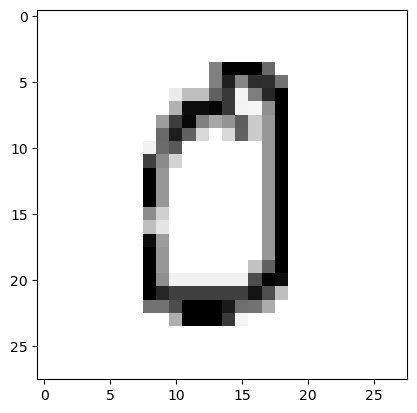

In [111]:
plt.imshow(some_digit_img,cmap=matplotlib.cm.binary,interpolation="nearest")

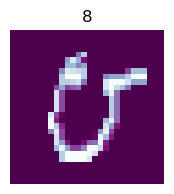

In [8]:
def plot_random_digit():       #The plot_random_digit() function now explicitly formats the title to include "Label: " followed by the actual label value.
    random_index = np.random.randint(0,X_train.shape[0])
    plt.imshow(X_train[random_index], cmap='BuPu_r')
    plt.title(y_train[random_index])
    plt.axis("Off")
    
plt.figure(figsize=[2,2]) #The figure size is adjusted to [2, 2] in the plt.figure() call, but you can modify it as needed.
plot_random_digit() #Finally, plt.show() is used to display the randomly selected digit.

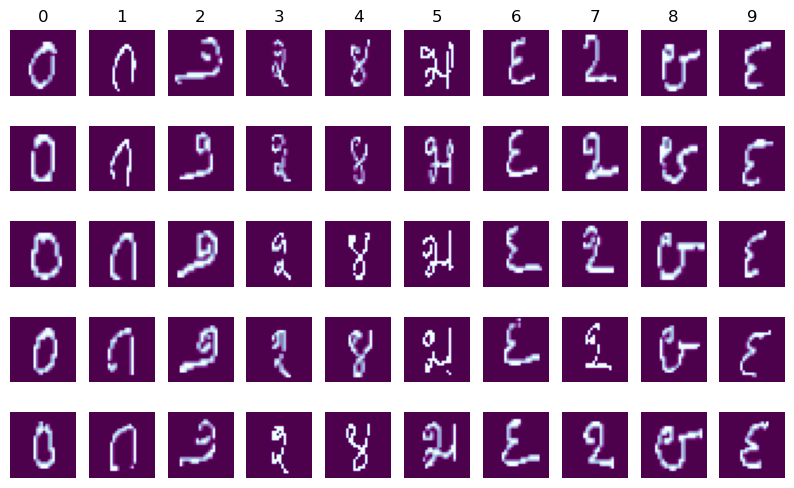

In [9]:
plt.figure(figsize=[10,6]) #The figure size is set to [10, 6] to adjust the overall size of the plot.
for i in range(50):
    plt.subplot(5, 10, i+1) #The plt.subplot(5, 10, i+1) function is used to create a 5x10 grid of subplots, and i+1 ensures proper indexing.
    plt.axis('Off')  #plt.axis('off') is used to remove axis labels and ticks for all subplots.
    if i < 10:    #The if i < 10: condition is used to set titles for the first row of subplots.
        plt.title(y_train[i])
    plt.imshow(X_train[i], cmap='BuPu_r')    #plt.imshow() is used to display the grid of images

In [10]:
y_train[90]

0

## Performing PCA to the data

In [113]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

#### Perform PCA with 10 components

In [114]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [115]:
y_train[1].dtype

dtype('uint8')

## FUNCTION TO FIND OUT VARIOUS PARAMETERS

In [116]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score,confusion_matrix

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Predict labels for the test data
    y_pred = model.predict(x_test)

    # Calculate accuracy, f1-score, and recall
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    # Calculate ROC-AUC score
    y_pred_proba = model.predict_proba(x_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    
    ## Calculating Confusion Matrix
    conf_matrix=confusion_matrix(y_test,y_pred)

    # Return evaluation metrics
    return accuracy, f1, recall, roc_auc, conf_matrix

In [117]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)


Decision Tree Accuracy: 0.8008
Decision Tree F1-score: 0.8001061971764247
Decision Tree Recall: 0.8008000000000001
Decision Tree ROC-AUC: 0.8893333333333333
Decision Tree Confusion Matrix:
[[727 143  11  36   8   4   2  14  38  17]
 [ 88 802   4  32  14  13   3   9  25  10]
 [  6   3 926  13   4  16  15   8   4   5]
 [ 21  13   6 779  37  29  16  57  18  24]
 [  0   0   1  25 857  56  12   7  17  25]
 [  8  16   6  20 111 794  13   7  12  13]
 [  7   6   5  45  16  26 771  99   4  21]
 [  9  11   8  66  25   7 158 660  19  37]
 [ 53  20  11   5   9  10   4   6 868  14]
 [ 16  42   3   9  26  10   5  10  55 824]]


In [118]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)


Random Forest Accuracy: 0.875
Random Forest F1-score: 0.8743619762017403
Random Forest Recall: 0.875
Random Forest ROC-AUC: 0.9890107222222223
Random Forest Confusion Matrix [[780 151   1  31   5   0   2   4  19   7]
 [ 34 909   1  21   6   1   0   3  15  10]
 [  3   1 984   1   0   6   0   3   1   1]
 [  9   7   1 882  20  21   9  32  16   3]
 [  0   2   0  26 919  33   2   3   8   7]
 [  0   3   3  10 121 846   4   2   7   4]
 [  3   6   1  48  14  22 835  53   1  17]
 [  5   9   0  44  25   2 130 745   8  32]
 [ 14  13   2   5   3   5   1   0 951   6]
 [  6  11   0   3  19   0   7   3  52 899]]


In [119]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7724
Naive Bayes F1-score: 0.7710198325245863
Naive Bayes Recall: 0.7724
Naive Bayes ROC-AUC: 0.9723118555555557
Naive Bayes Confusion Matrix:
[[608 229  16  70   8   0   2  13  45   9]
 [ 26 747  10 121   8   2   0   0  66  20]
 [  9   1 967   3   0  15   1   3   1   0]
 [ 13   7   2 844  32  16  21  64   0   1]
 [  1   1   1  38 872  43   1   8  28   7]
 [  0   2  15  46 167 730   6  16  13   5]
 [  5   9  50  30  25  44 730  94   3  10]
 [  9  17   4  80  50   1 176 651   2  10]
 [ 89  35  26   6   4   3   2   4 823   8]
 [ 19  28   1   8  62   0   3  21 106 752]]


In [120]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.881
K-NN F1-score: 0.879912445811677
K-NN Recall: 0.881
K-NN ROC-AUC: 0.9738384833333333
K-NN Confusion Matrix
[[776 169   1  27   2   0   2   3  14   6]
 [ 18 942   0  17   4   1   0   2  11   5]
 [  6   1 979   3   0   7   1   2   1   0]
 [ 10  12   0 887  20  22   4  15  26   4]
 [  0   1   0  14 953  21   1   2   4   4]
 [  0   3   0   9 116 856   3   3   4   6]
 [  0   6   0  43  21  10 840  66   0  14]
 [  8   7   0  52  33   3 166 700   6  25]
 [ 15  10   2   2   3   6   2   0 957   3]
 [  5   8   0   0  24   0   7   5  31 920]]


In [121]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.8867
SVM F1-score: 0.8861890389898542
SVM Recall: 0.8867
SVM ROC-AUC: 0.9925039
SVM confusion Matrix
[[811 139   1  22   6   0   1   2  15   3]
 [ 20 923   0  27   3   3   0   4  12   8]
 [  3   2 984   1   0   5   0   3   1   1]
 [  8  11   0 884  20  23   9  27  18   0]
 [  0   1   0  14 948  22   0   1   5   9]
 [  0   4   1   4 124 854   3   3   4   3]
 [  0  10   1  49  20  22 845  40   0  13]
 [  6  13   0  32  18   4 135 748   7  37]
 [  8  15   4   0   4   4   3   0 958   4]
 [  2  14   0   0  22   0   6   4  40 912]]


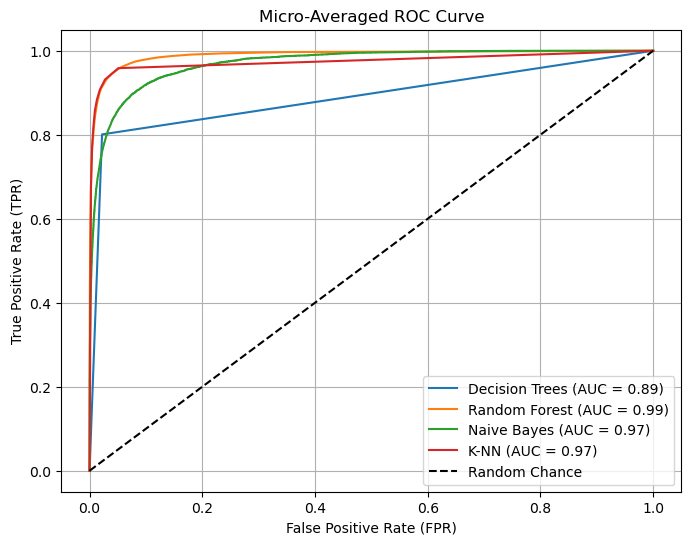

In [122]:
# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_pred_probs = dt_classifier.predict_proba(X_test_pca)
dt_fpr, dt_tpr, _ = roc_curve(y_test_bin.ravel(), dt_pred_probs.ravel())
dt_auc = auc(dt_fpr, dt_tpr)

# For Random Forest
rf_pred_probs = rf_classifier.predict_proba(X_test_pca)
rf_fpr, rf_tpr, _ = roc_curve(y_test_bin.ravel(), rf_pred_probs.ravel())
rf_auc = auc(rf_fpr, rf_tpr)

# For Naive Bayes
nb_pred_probs = nb_classifier.predict_proba(X_test_pca)
nb_fpr, nb_tpr, _ = roc_curve(y_test_bin.ravel(), nb_pred_probs.ravel())
nb_auc = auc(nb_fpr, nb_tpr)

# For K-NN
knn_pred_probs = knn_classifier.predict_proba(X_test_pca)
knn_fpr, knn_tpr, _ = roc_curve(y_test_bin.ravel(), knn_pred_probs.ravel())
knn_auc = auc(knn_fpr, knn_tpr)


# Plot micro-averaged ROC curves for each classifier
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Trees (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot(knn_fpr, knn_tpr, label='K-NN (AUC = {:.2f})'.format(knn_auc))
#plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Micro-Averaged ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [123]:
# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_fpr = dict()
dt_tpr = dict()
dt_auc = dict()
for class_idx in range(10):
    dt_pred_probs = dt_classifier.predict_proba(X_test_pca)[:, class_idx]
    dt_fpr[class_idx], dt_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], dt_pred_probs)
    dt_auc[class_idx] = auc(dt_fpr[class_idx], dt_tpr[class_idx])

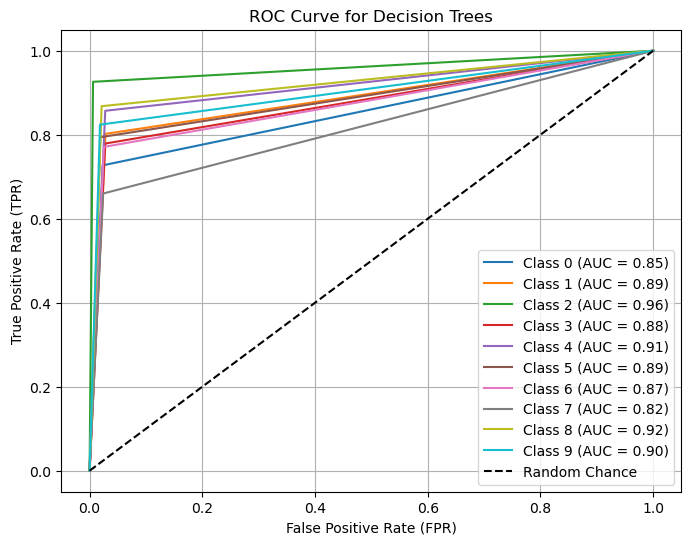

In [124]:
# Plot ROC curves for each class for Decision Trees
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(dt_fpr[class_idx], dt_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, dt_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Trees')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [125]:
# For Random Forest
rf_fpr = dict()
rf_tpr = dict()
rf_auc = dict()
for class_idx in range(10):
    rf_pred_probs = rf_classifier.predict_proba(X_test_pca)[:, class_idx]
    rf_fpr[class_idx], rf_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], rf_pred_probs)
    rf_auc[class_idx] = auc(rf_fpr[class_idx], rf_tpr[class_idx])

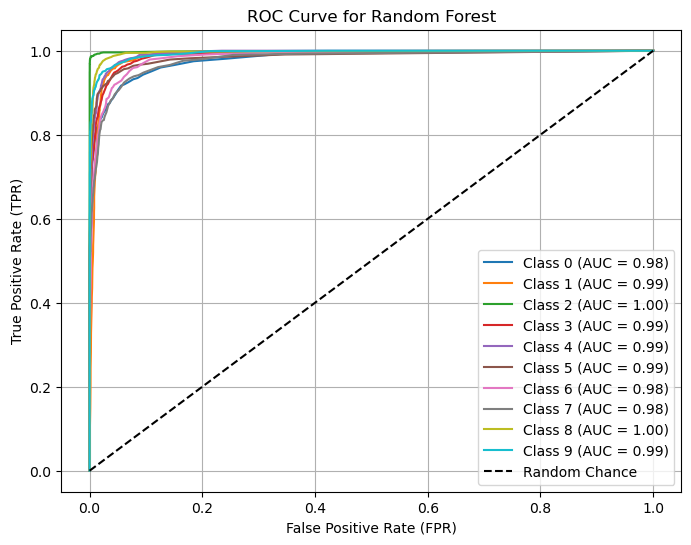

In [126]:
# Plot ROC curves for each class for Random Forest
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(rf_fpr[class_idx], rf_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, rf_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [127]:
# For Naive Bayes
nb_fpr = dict()
nb_tpr = dict()
nb_auc = dict()
for class_idx in range(10):
    nb_pred_probs = nb_classifier.predict_proba(X_test_pca)[:, class_idx]
    nb_fpr[class_idx], nb_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], nb_pred_probs)
    nb_auc[class_idx] = auc(nb_fpr[class_idx], nb_tpr[class_idx])

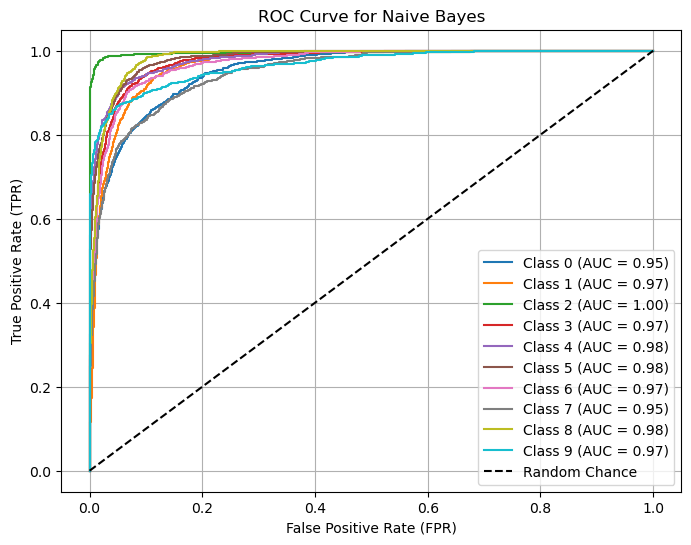

In [128]:
# Plot ROC curves for each class for Naive Bayes
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(nb_fpr[class_idx], nb_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, nb_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [129]:
# For K-NN
knn_fpr = dict()
knn_tpr = dict()
knn_auc = dict()
for class_idx in range(10):
    knn_pred_probs = knn_classifier.predict_proba(X_test_pca)[:, class_idx]
    knn_fpr[class_idx], knn_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], knn_pred_probs)
    knn_auc[class_idx] = auc(knn_fpr[class_idx], knn_tpr[class_idx])

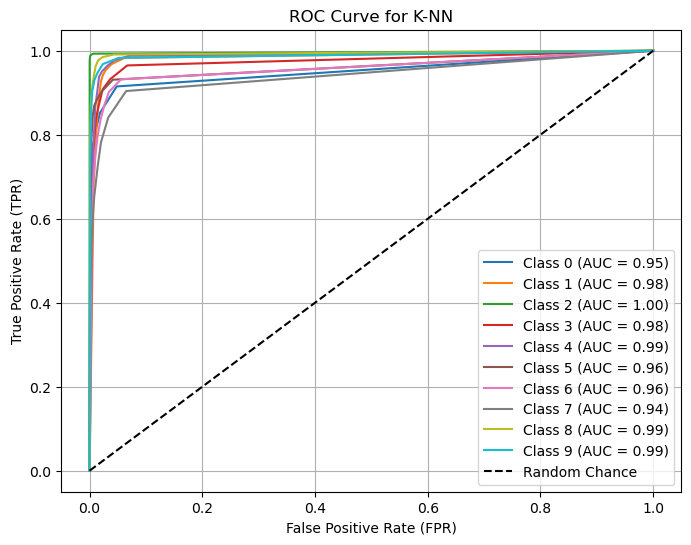

In [130]:
# Plot ROC curves for each class for K-NN
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(knn_fpr[class_idx], knn_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, knn_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for K-NN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### WHEN the PCA component is 15

In [131]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with 15 components
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)


In [132]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.8031
Decision Tree F1-score: 0.8021476263330267
Decision Tree Recall: 0.8030999999999999
Decision Tree ROC-AUC: 0.890611111111111
Decision Tree Confusion Matrix:
[[720 153  13  32  10   5   6   6  38  17]
 [ 85 813   9  25   6  14   6   7  23  12]
 [  3   3 932  11   4  25   7   7   4   4]
 [ 16   6  14 785  31  36  32  63  10   7]
 [  2   4   2  31 837  54   7  15  18  30]
 [  7   3   3  17 119 809  10   6  14  12]
 [  5  10   7  43  20  29 773  85   7  21]
 [ 16   8  10  47  26   7 142 668  14  62]
 [ 46  17  16   3   7  25   4   2 863  17]
 [ 12  39   4   2  20  16   9   9  58 831]]


In [133]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix")
print(rf_confusion_matrix)

Random Forest Accuracy: 0.8939
Random Forest F1-score: 0.8933077527432512
Random Forest Recall: 0.8938999999999998
Random Forest ROC-AUC: 0.9923394333333333
Random Forest Confusion Matrix
[[797 152   2  19   7   0   2   3  14   4]
 [ 23 922   1  21   3   4   0   3  14   9]
 [  4   1 981   2   0   8   1   1   1   1]
 [  9   8   1 917  15  17   4  23   6   0]
 [  0   1   0  18 938  24   4   3   7   5]
 [  0   1   0   9 108 870   2   3   5   2]
 [  3   5   2  32  19  21 872  25   4  17]
 [  6  11   0  36  23   5 107 768   6  38]
 [ 14   4   1   1   3   4   2   0 969   2]
 [  4  10   0   0  14   0   6   1  60 905]]


In [134]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7837
Naive Bayes F1-score: 0.7821239002492734
Naive Bayes Recall: 0.7837000000000001
Naive Bayes ROC-AUC: 0.9747129222222222
Naive Bayes Confusion Matrix:
[[601 237  19  46  11   0   2  14  61   9]
 [ 17 776   8  97  17   6   0   2  60  17]
 [  9   2 976   4   0   6   1   0   1   1]
 [ 17  10   3 793  37  19  31  90   0   0]
 [  0   1   1  18 874  40   2  22  32  10]
 [  0   1   9  34 179 735   5  19  13   5]
 [  6   7  53  21  25  39 786  48   2  13]
 [  8  16   8  51  34   1 193 675   2  12]
 [116  25  20   3   3   6   3   2 815   7]
 [ 27  12   2   0  28   0  13  11 101 806]]


In [135]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.9079
K-NN F1-score: 0.907354351189815
K-NN Recall: 0.9079
K-NN ROC-AUC: 0.9825606722222222
K-NN Confusion Matrix
[[804 161   3  14   7   0   1   0   7   3]
 [ 15 963   0   5   6   0   0   0   7   4]
 [  4   1 985   4   0   4   1   0   1   0]
 [  9  11   1 916  24  23   2  11   2   1]
 [  0   1   0   5 973  10   1   1   3   6]
 [  0   0   0  10  93 893   2   0   1   1]
 [  2   1   0  24  28  12 891  33   0   9]
 [  7   8   1  36  29   5 121 763   2  28]
 [ 18   6   2   1   2   4   3   0 961   3]
 [  8   9   0   0  20   5   7   2  19 930]]


In [136]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.9146
SVM F1-score: 0.9141421333622046
SVM Recall: 0.9146000000000001
SVM ROC-AUC: 0.9953043888888888
SVM confusion Matrix
[[827 129   1  17   5   0   0   4  12   5]
 [ 14 950   0  12   3   3   1   3  10   4]
 [  3   0 987   3   0   3   1   1   2   0]
 [  7   7   1 913  17  19   6  28   2   0]
 [  0   1   0   9 959  15   2   1   6   7]
 [  0   0   0   8 103 883   3   0   3   0]
 [  0   2   1  20  19  20 911  10   1  16]
 [ 17   9   0  21  17   1  81 804   2  48]
 [  7   3   2   1   2   3   1   0 976   5]
 [  5  10   0   0   8   0   5   0  36 936]]


### Performing incremental PCA and reducing the size to 15 components

In [140]:
# Reshape the training and test data to 2D
x_train_2d = X_train.reshape(x_train.shape[0], -1)
x_test_2d = X_test.reshape(X_test.shape[0], -1)

# Create and fit Incremental PCA
ipca = IncrementalPCA(n_components=10, batch_size=1000)
for batch in np.array_split(x_train_2d, len(x_train_2d) // 1000):
    ipca.partial_fit(batch)

# Transform the data using IPCA
x_train_ipca = ipca.transform(x_train_2d)
x_test_ipca = ipca.transform(x_test_2d)

# Print the shape of the transformed data
print("Training data shape after IPCA:", x_train_ipca.shape)
print("Test data shape after IPCA:", x_test_ipca.shape)

Training data shape after IPCA: (60000, 10)
Test data shape after IPCA: (10000, 10)


In [141]:
'x_train_ipca','x_test_ipca'

('x_train_ipca', 'x_test_ipca')

In [143]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier,x_train_ipca, y_train, x_test_ipca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.8028
Decision Tree F1-score: 0.8020572170331091
Decision Tree Recall: 0.8028000000000001
Decision Tree ROC-AUC: 0.8904444444444444
Decision Tree Confusion Matrix:
[[723 152  11  31   6   6   4  15  37  15]
 [ 93 794  11  28   6   9   6  14  27  12]
 [  3   4 929  14   2  12  10  15   7   4]
 [ 17  16   5 775  33  38  30  55  20  11]
 [  2   2   2  48 832  49  14   8  21  22]
 [  2   6  12  22 115 794  13  11  13  12]
 [  5  10   8  58  18  27 768  84   6  16]
 [ 13  10   6  75  21   8 137 672  13  45]
 [ 33  10   6   7   3  17   4   2 899  19]
 [ 14  33   1   6  19  11  10   8  56 842]]


In [144]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, x_train_ipca, y_train, x_test_ipca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix")
print(rf_confusion_matrix)

Random Forest Accuracy: 0.8769
Random Forest F1-score: 0.8764826262884334
Random Forest Recall: 0.8769
Random Forest ROC-AUC: 0.9893896333333334
Random Forest Confusion Matrix
[[776 155   2  31   3   1   2   3  19   8]
 [ 24 911   1  26   4   5   1   2  16  10]
 [  4   1 979   4   0   9   0   2   1   0]
 [  9  10   1 878  15  27   6  36  16   2]
 [  0   2   0  33 918  31   1   3   7   5]
 [  0   5   0  12 119 846   3   3   7   5]
 [  3  10   1  56  13  34 838  27   4  14]
 [  4  11   0  57  25   2 103 763   8  27]
 [ 13   8   3   2   2   8   1   0 960   3]
 [  5   7   0   4  16   0   7   3  58 900]]


In [145]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, x_train_ipca, y_train, x_test_ipca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7627
Naive Bayes F1-score: 0.7614761019280496
Naive Bayes Recall: 0.7626999999999999
Naive Bayes ROC-AUC: 0.9714617333333333
Naive Bayes Confusion Matrix:
[[612 208   8  91   5   0   1  16  46  13]
 [ 13 725  10 154   5   0   0   1  68  24]
 [  9   1 945   6   0  34   1   3   1   0]
 [ 14   6   6 871  26  15  21  41   0   0]
 [  1   0   1  57 862  41   1   3  25   9]
 [  0   2  15  47 171 725   5  22   5   8]
 [  5   6  53  49  17  49 726  75   8  12]
 [ 15  15   3 193  26   1 174 553   2  18]
 [ 95  31  20   7   3   9   3   3 821   8]
 [ 13  20   1  23  29   0   1  17 109 787]]


In [147]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, x_train_ipca, y_train, x_test_ipca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.8835
K-NN F1-score: 0.8826611711889891
K-NN Recall: 0.8835000000000001
K-NN ROC-AUC: 0.9738341444444444
K-NN Confusion Matrix
[[789 166   1  22   3   0   2   0  13   4]
 [ 19 940   0  16   4   2   1   1  10   7]
 [  4   1 981   3   0   7   1   2   1   0]
 [ 10  13   0 888  26  22   3  18  20   0]
 [  0   1   0  17 947  24   1   1   4   5]
 [  0   4   0  12 126 845   2   2   4   5]
 [  2   7   0  38  20  20 846  54   1  12]
 [  7  11   0  58  26   5 141 721   7  24]
 [ 12   4   3   1   1   8   2   0 966   3]
 [  6   8   0   0  26   0   6   2  40 912]]


In [148]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, x_train_ipca, y_train, x_test_ipca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.8933
SVM F1-score: 0.8926762445795117
SVM Recall: 0.8933
SVM ROC-AUC: 0.9930252111111111
SVM confusion Matrix
[[813 134   1  24   3   0   0   3  14   8]
 [ 21 927   0  21   1   3   2   4  13   8]
 [  2   2 983   3   0   5   0   2   2   1]
 [  8   8   0 886  20  24  11  27  15   1]
 [  0   1   0   9 955  20   0   2   5   8]
 [  0   3   0   5 121 857   6   2   3   3]
 [  1   7   1  46  20  32 849  28   3  13]
 [  6  14   0  40  14   4 109 766   9  38]
 [  7   3   3   4   3   4   0   0 974   2]
 [  3   8   0   0  21   0   6   1  38 923]]
